# Importing Libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pickle
from tqdm import tqdm

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

In [1]:
# Importing Libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pickle
from tqdm import tqdm

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

# Loading the dataset

In [192]:

df = pd.read_csv('temp.csv',index_col="Date")
df.head(10)


,_id,Rain,Temp Max,Temp Min
Date,,,,
01-01-1951,1,0,24.79000092,12.97999954
02-01-1951,2,0,23.57999992,10.97999954
03-01-1951,3,0,23.85000038,10.97000027
04-01-1951,4,0,24.68000031,12.02000046
05-01-1951,5,0,24.63999939,12.92000008
06-01-1951,6,0,25.37999916,12.76000023
07-01-1951,7,0,25.46999931,12.75
08-01-1951,8,0,25.68000031,12.85000038
09-01-1951,9,0,26.17000008,13.97000027


#data processing

In [193]:
pd.isnull(df).sum()


_id         0
Rain        0
Temp Max    1
Temp Min    2
dtype: int64

In [194]:
df.isnull().sum()

_id         0
Rain        0
Temp Max    1
Temp Min    2
dtype: int64

In [198]:
df.columns=df.columns.str.lower()

In [199]:
df


,_id,rain,temp max,temp min
Date,,,,
01-01-1951,1,0,24.79000092,12.97999954
02-01-1951,2,0,23.57999992,10.97999954
03-01-1951,3,0,23.85000038,10.97000027
04-01-1951,4,0,24.68000031,12.02000046
05-01-1951,5,0,24.63999939,12.92000008
...,...,...,...,...
18-06-2024,26802,Tr,36.2,30
19-06-2024,26803,Tr,35.3,30.4
45463,26804,0,34.4,28.2


In [200]:
df[['temp max', 'temp min']].isnull().sum()

temp max    1
temp min    2
dtype: int64

In [201]:
df[['temp max', 'temp min']].dtypes

temp max    object
temp min    object
dtype: object

In [202]:
df['temp max'] = pd.to_numeric(df['temp max'], errors='coerce')
df['temp min'] = pd.to_numeric(df['temp min'], errors='coerce')

In [203]:
df['rain'] = df['rain'].replace('Tr', 0.05)

In [204]:
df

,_id,rain,temp max,temp min
Date,,,,
01-01-1951,1,0,24.790001,12.98
02-01-1951,2,0,23.580000,10.98
03-01-1951,3,0,23.850000,10.97
04-01-1951,4,0,24.680000,12.02
05-01-1951,5,0,24.639999,12.92
...,...,...,...,...
18-06-2024,26802,0.05,36.200000,30.00
19-06-2024,26803,0.05,35.300000,30.40
45463,26804,0,34.400000,28.20


In [205]:
df[['temp max', 'temp min']].dtypes

temp max    float64
temp min    float64
dtype: object

In [206]:
#change the data type of index 
df.index = df.index.astype(str)
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df.index = pd.to_datetime(
    df.index,
    format='%d-%m-%Y',
    errors='coerce'
)
print(df.index.dtype)

datetime64[ns]


In [207]:
df = df[~df.index.isna()]

In [208]:
#fill the missing value
df[['temp max', 'temp min']] = df[['temp max', 'temp min']].interpolate(method='time')

In [209]:
df[['temp max', 'temp min']].isnull().sum()

temp max    0
temp min    0
dtype: int64

In [210]:
df.index.year.value_counts().sort_index()

Date
1951    365
1952    366
1953    365
1954    365
1955    365
       ... 
2020    366
2021    365
2022    365
2023    365
2024    140
Name: count, Length: 74, dtype: int64

In [211]:
df['rain'].dtype

dtype('float64')

<Axes: xlabel='Date'>

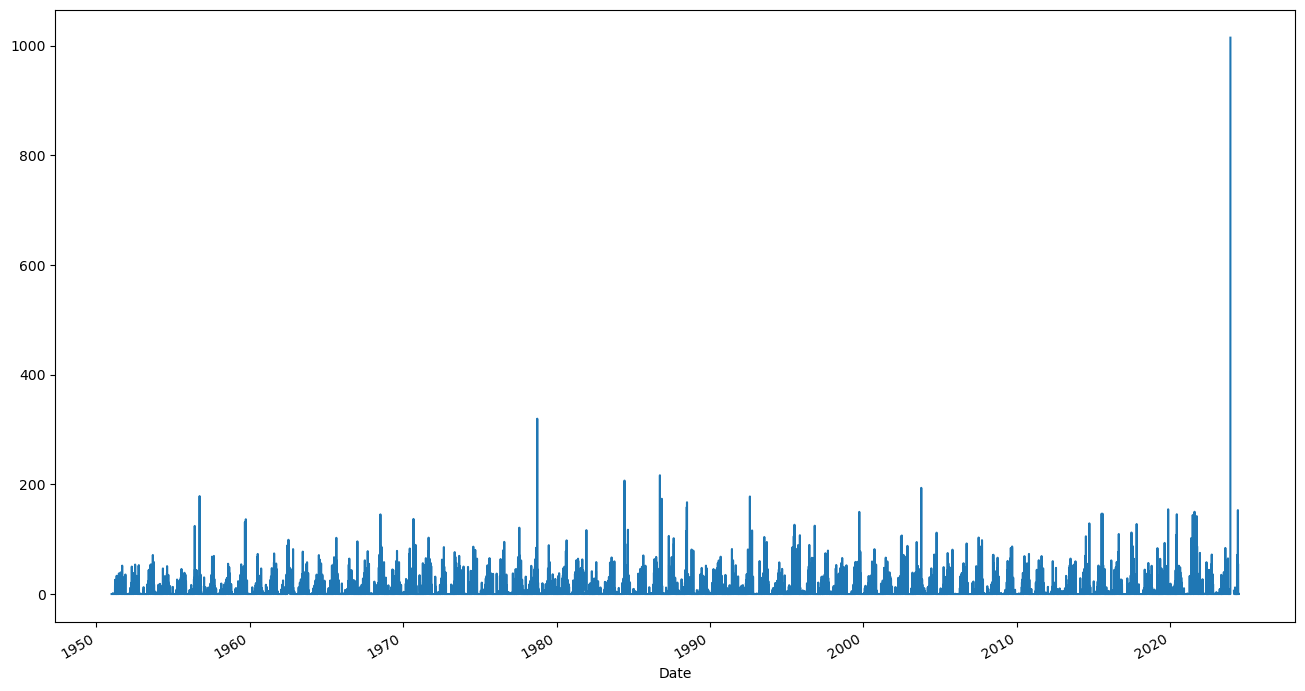

In [174]:
df["rain"].plot()

In [153]:
df

,_id,rain,temp max,temp min
Date,,,,
1951-01-01,1,0.00,24.790001,12.98
1951-01-02,2,0.00,23.580000,10.98
1951-01-03,3,0.00,23.850000,10.97
1951-01-04,4,0.00,24.680000,12.02
1951-01-05,5,0.00,24.639999,12.92
...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20
2024-06-16,26800,0.00,36.600000,29.30
2024-06-17,26801,0.00,36.400000,30.20


In [214]:
df["target"]=df.shift(-1)["temp max"]
#df = df.dropna(subset=['rain'])
df.isnull().sum()

_id         0
rain        0
temp max    0
temp min    0
target      1
dtype: int64

In [217]:
df=df.ffill()
df

,_id,rain,temp max,temp min,target
Date,,,,,
1951-01-01,1,0.00,24.790001,12.98,23.580000
1951-01-02,2,0.00,23.580000,10.98,23.850000
1951-01-03,3,0.00,23.850000,10.97,24.680000
1951-01-04,4,0.00,24.680000,12.02,24.639999
1951-01-05,5,0.00,24.639999,12.92,25.379999
...,...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20,36.600000
2024-06-16,26800,0.00,36.600000,29.30,36.400000
2024-06-17,26801,0.00,36.400000,30.20,36.200000


# 1. association rule learning

In [218]:
# Temperature bins
df['temp_max_cat'] = pd.cut(
    df['temp max'],
    bins=[-np.inf, 20, 30, 40, np.inf],
    labels=['Cold','Moderate','Hot','Very Hot']
)

df['temp_min_cat'] = pd.cut(
    df['temp min'],
    bins=[-np.inf, 10, 20, 30, np.inf],
    labels=['Very Cold','Cold','Warm','Hot']
)

# Rain categories
df['rain_cat'] = pd.cut(df['rain'], bins=[-np.inf, 0, 5, 20, np.inf],
                         labels=['No Rain','Light','Moderate','Heavy'])


In [219]:
df

,_id,rain,temp max,temp min,target,temp_max_cat,temp_min_cat,rain_cat
Date,,,,,,,,
1951-01-01,1,0.00,24.790001,12.98,23.580000,Moderate,Cold,No Rain
1951-01-02,2,0.00,23.580000,10.98,23.850000,Moderate,Cold,No Rain
1951-01-03,3,0.00,23.850000,10.97,24.680000,Moderate,Cold,No Rain
1951-01-04,4,0.00,24.680000,12.02,24.639999,Moderate,Cold,No Rain
1951-01-05,5,0.00,24.639999,12.92,25.379999,Moderate,Cold,No Rain
...,...,...,...,...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20,36.600000,Hot,Hot,No Rain
2024-06-16,26800,0.00,36.600000,29.30,36.400000,Hot,Warm,No Rain
2024-06-17,26801,0.00,36.400000,30.20,36.200000,Hot,Hot,No Rain


In [220]:
df["rain"].dtype

dtype('float64')

In [221]:
df.isnull().sum()

_id             0
rain            0
temp max        0
temp min        0
target          0
temp_max_cat    0
temp_min_cat    0
rain_cat        0
dtype: int64

In [222]:
df_cat = df[['temp_max_cat','temp_min_cat','rain_cat']]
df_cat

,temp_max_cat,temp_min_cat,rain_cat
Date,,,
1951-01-01,Moderate,Cold,No Rain
1951-01-02,Moderate,Cold,No Rain
1951-01-03,Moderate,Cold,No Rain
1951-01-04,Moderate,Cold,No Rain
1951-01-05,Moderate,Cold,No Rain
...,...,...,...
2024-06-15,Hot,Hot,No Rain
2024-06-16,Hot,Warm,No Rain
2024-06-17,Hot,Hot,No Rain


# One Hot Encoding

In [223]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(drop='first',sparse_output=False)

df_encoded_array=one.fit_transform(df_cat)
df_encoded=pd.DataFrame(df_encoded_array, columns=one.get_feature_names_out(df_cat.columns))
df_encoded

,temp_max_cat_Hot,temp_max_cat_Moderate,temp_max_cat_Very Hot,temp_min_cat_Hot,temp_min_cat_Very Cold,temp_min_cat_Warm,rain_cat_Light,rain_cat_Moderate,rain_cat_No Rain
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
26744,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26745,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26746,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26747,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Apply Apriori and Association Rules

In [257]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort rules by lift for strongest patterns
rules = rules.sort_values('lift', ascending=False)
rules.head(10)

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.24.0-py3-none-any.whl (1.4 MB)


C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,"(temp_max_cat_Hot, rain_cat_Moderate)",(temp_min_cat_Warm),0.123855,0.686306,0.122883,0.992152,1.445641,1.0,0.037881,39.971851,0.351843,0.178797,0.974982,0.585601
7,"(rain_cat_Light, temp_max_cat_Hot)",(temp_min_cat_Warm),0.163894,0.686306,0.162212,0.989735,1.442120,1.0,0.049730,30.560764,0.366672,0.235777,0.967278,0.613045
14,"(rain_cat_No Rain, temp_min_cat_Warm)",(temp_max_cat_Hot),0.308423,0.681483,0.295562,0.958303,1.406202,1.0,0.085377,7.638842,0.417689,0.425672,0.869090,0.696004
6,(rain_cat_Moderate),(temp_min_cat_Warm),0.144043,0.686306,0.137239,0.952764,1.388250,1.0,0.038381,6.641005,0.326732,0.198004,0.849420,0.576366
8,"(rain_cat_Light, temp_min_cat_Warm)",(temp_max_cat_Hot),0.174175,0.681483,0.162212,0.931316,1.366601,1.0,0.043514,4.637402,0.324836,0.233921,0.784362,0.584672
12,(rain_cat_Moderate),"(temp_max_cat_Hot, temp_min_cat_Warm)",0.144043,0.630865,0.122883,0.853101,1.352273,1.0,0.032012,2.512859,0.304343,0.188464,0.602047,0.523943
9,(rain_cat_Light),"(temp_max_cat_Hot, temp_min_cat_Warm)",0.190175,0.630865,0.162212,0.852959,1.352047,1.0,0.042237,2.510416,0.321527,0.246212,0.601660,0.555042
0,(temp_max_cat_Hot),(temp_min_cat_Warm),0.681483,0.686306,0.630865,0.925723,1.348848,1.0,0.163159,4.223285,0.811973,0.856078,0.763217,0.922470
1,(temp_min_cat_Warm),(temp_max_cat_Hot),0.686306,0.681483,0.630865,0.919218,1.348848,1.0,0.163159,3.942905,0.824456,0.856078,0.746380,0.922470
4,(temp_max_cat_Moderate),(rain_cat_No Rain),0.316685,0.597406,0.253019,0.798961,1.337385,1.0,0.063830,2.002571,0.369189,0.382740,0.500642,0.611245


In [225]:
df

,_id,rain,temp max,temp min,target,temp_max_cat,temp_min_cat,rain_cat
Date,,,,,,,,
1951-01-01,1,0.00,24.790001,12.98,23.580000,Moderate,Cold,No Rain
1951-01-02,2,0.00,23.580000,10.98,23.850000,Moderate,Cold,No Rain
1951-01-03,3,0.00,23.850000,10.97,24.680000,Moderate,Cold,No Rain
1951-01-04,4,0.00,24.680000,12.02,24.639999,Moderate,Cold,No Rain
1951-01-05,5,0.00,24.639999,12.92,25.379999,Moderate,Cold,No Rain
...,...,...,...,...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20,36.600000,Hot,Hot,No Rain
2024-06-16,26800,0.00,36.600000,29.30,36.400000,Hot,Warm,No Rain
2024-06-17,26801,0.00,36.400000,30.20,36.200000,Hot,Hot,No Rain


# 2.Regression

In [227]:
df = df.drop(columns=['temp_max_cat','temp_min_cat','rain_cat'])
df

,_id,rain,temp max,temp min,target
Date,,,,,
1951-01-01,1,0.00,24.790001,12.98,23.580000
1951-01-02,2,0.00,23.580000,10.98,23.850000
1951-01-03,3,0.00,23.850000,10.97,24.680000
1951-01-04,4,0.00,24.680000,12.02,24.639999
1951-01-05,5,0.00,24.639999,12.92,25.379999
...,...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20,36.600000
2024-06-16,26800,0.00,36.600000,29.30,36.400000
2024-06-17,26801,0.00,36.400000,30.20,36.200000


In [235]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.001,max_iter=500,solver='sparse_cg')
df.corr()

,_id,rain,temp max,temp min,target
_id,1.000000,-0.001459,0.022900,0.050994,0.022857
rain,-0.001459,1.000000,0.001746,0.183395,-0.014856
temp max,0.022900,0.001746,1.000000,0.818625,0.941189
temp min,0.050994,0.183395,0.818625,1.000000,0.804578
target,0.022857,-0.014856,0.941189,0.804578,1.000000


In [236]:
predictors = df.columns[~df.columns.isin(["target"])]
predictors

Index(['_id', 'rain', 'temp max', 'temp min'], dtype='object')

In [237]:
def backtest(df, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [238]:
predictions = backtest(df, rr, predictors)

In [239]:
predictions

,actual,prediction,diff
Date,,,
1960-12-29,28.540001,28.795263,0.255262
1960-12-30,27.590000,28.671670,1.081670
1960-12-31,27.190001,27.798202,0.608201
1961-01-01,25.090000,27.481582,2.391582
1961-01-02,25.700001,25.634941,0.065060
...,...,...,...
2024-06-15,36.600000,37.114420,0.514420
2024-06-16,36.400000,36.367008,0.032992
2024-06-17,36.200000,36.275000,0.075000


In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

0.8238407667465564

In [241]:
pd.Series(rr.coef_, index=predictors)

_id        -0.000001
rain       -0.009733
temp max    0.839417
temp min    0.084308
dtype: float64

In [244]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["temp max", "temp min", "rain"]:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year, group_keys=False).apply(expand_mean)

In [245]:
df

,_id,rain,temp max,temp min,target,month_avg_temp max,day_avg_temp max,month_avg_temp min,day_avg_temp min,month_avg_rain,day_avg_rain
Date,,,,,,,,,,,
1951-01-01,1,0.00,24.790001,12.98,23.580000,24.790001,24.790001,12.980000,12.980000,0.000000,0.000000
1951-01-02,2,0.00,23.580000,10.98,23.850000,24.185000,23.580000,11.980000,10.980000,0.000000,0.000000
1951-01-03,3,0.00,23.850000,10.97,24.680000,24.073334,23.850000,11.643333,10.970000,0.000000,0.000000
1951-01-04,4,0.00,24.680000,12.02,24.639999,24.225000,24.680000,11.737500,12.020000,0.000000,0.000000
1951-01-05,5,0.00,24.639999,12.92,25.379999,24.308000,24.639999,11.974000,12.920000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15,26799,0.00,37.400000,30.20,36.600000,33.740829,33.866576,26.512186,26.388614,9.313821,7.639040
2024-06-16,26800,0.00,36.600000,29.30,36.400000,33.742125,33.545866,26.513450,26.563785,9.309599,10.643464
2024-06-17,26801,0.00,36.400000,30.20,36.200000,33.743330,33.266138,26.515120,26.289928,9.305381,12.585761


In [246]:
predictors = df.columns[~df.columns.isin(["target"])]
predictors

Index(['_id', 'rain', 'temp max', 'temp min', 'month_avg_temp max',
       'day_avg_temp max', 'month_avg_temp min', 'day_avg_temp min',
       'month_avg_rain', 'day_avg_rain'],
      dtype='object')

In [247]:
predictions = backtest(df, rr, predictors)
predictions

,actual,prediction,diff
Date,,,
1960-12-29,28.540001,28.456830,0.083171
1960-12-30,27.590000,28.278538,0.688538
1960-12-31,27.190001,27.672394,0.482394
1961-01-01,25.090000,27.085698,1.995698
1961-01-02,25.700001,25.361369,0.338632
...,...,...,...
2024-06-15,36.600000,36.812172,0.212172
2024-06-16,36.400000,36.068614,0.331386
2024-06-17,36.200000,35.913186,0.286814


In [248]:
mean_squared_error(predictions["actual"], predictions["prediction"])

1.2219019192258584

# Draw Regression Line

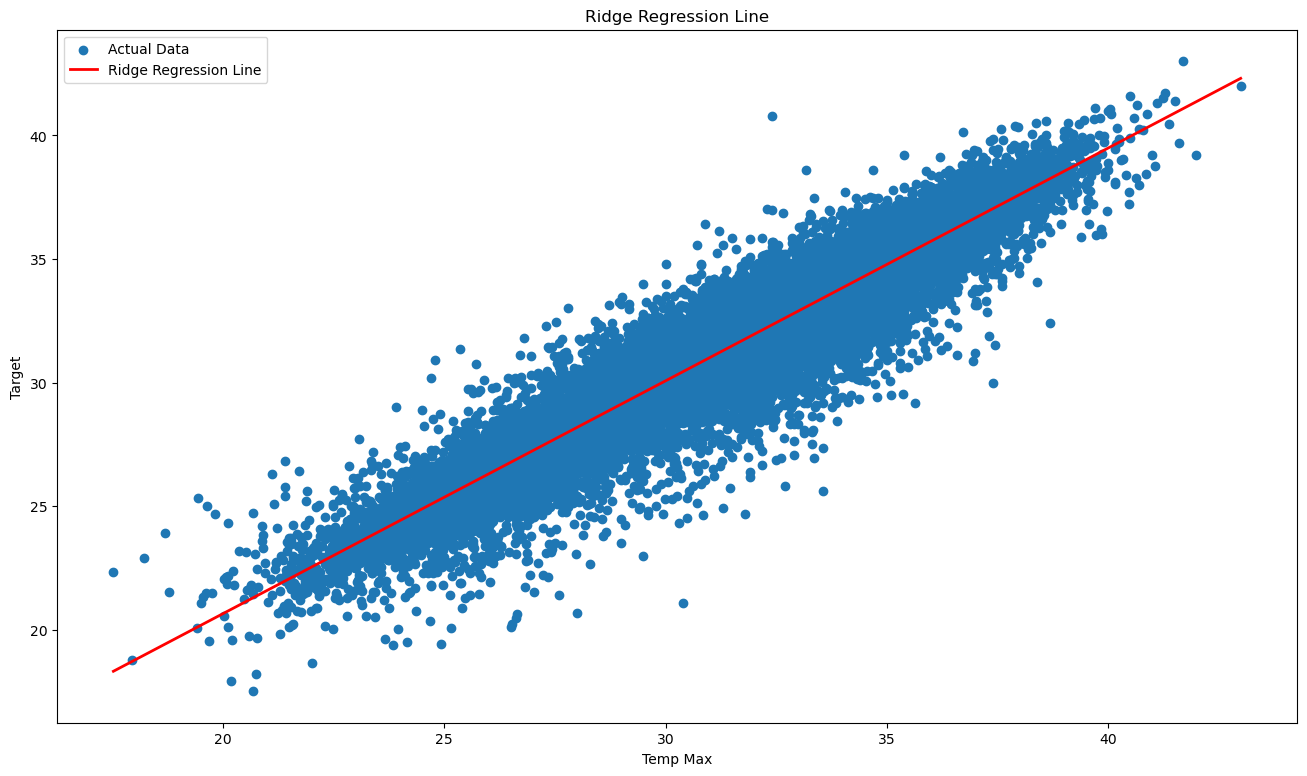

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Feature and target
X = df[['temp max']].values
y = df['target'].values

# Train Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Create smooth X values (100 points)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# 🔑 Predict ONLY for X_line
y_line = ridge.predict(X_line)

# Plot
plt.scatter(X, y, label='Actual Data')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Ridge Regression Line')

plt.xlabel("Temp Max")
plt.ylabel("Target")
plt.title("Ridge Regression Line")
plt.legend()
plt.show()